<a href="https://colab.research.google.com/github/thewallandus/ml-with-pytorch/blob/main/02_nueral_network_classification_with_pytorch_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nueral Network Classification with Pytorch

Classification is predicting if something is one thing or another.

##1. Make some data

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    # noise is for randomness
                    noise=0.03,
                    # random state is like the random seed
                    random_state=42
                    )

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X\n: {X[:5]}")
print(f"First 5 samples of y\n: {y[:5]}")

First 5 samples of X
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y
: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2": X[:, 1],
                        "label": y
                        })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


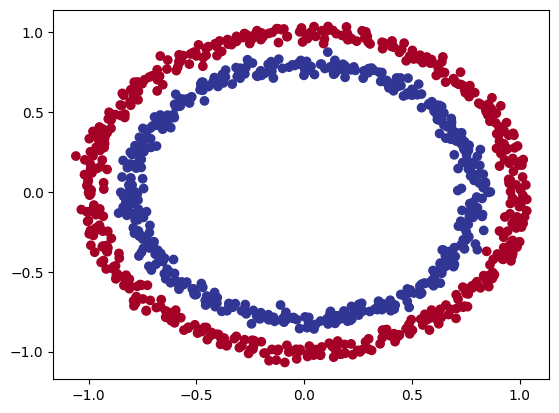

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

Note: the data we're working with is a toy dataset, a dataset that is small to experiment on, but still sizable enough to practice the fundamentals.

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape of one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [ ]:
import torch
from torch import nn

torch.__version__

'2.2.1+cu121'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data from numpy into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

# Split data into traning and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, #(20% of data will be test and 80% will be train)
    random_state=42 # similar to torch.manualseed, can't use torch.manual seed because that only works with pytroch code
)

In [ ]:
# train data is 100, test data is 200, split by sklearn
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a model

Lets build a model to classify our blue and red dots.

To do so we want to:

1. Setup device agnostic code so our code runs on an accelerator (GPU) if there is one.
2. Construct a model that inherits from nn.Module.
3. Define a loss function and optimizer.
4. Create a training and test loop.

In [ ]:
# Make device agnostic code:

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train, y_train

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
         1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
         0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,


In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

Now we've setup device agnostic code, lets create a model that:

- Subclass nn.Module
- Create 2 nn.Linear() layers capable of handling the shapes of our data
- Define a forward method that outlines the forward pass
- Instantiate an instance of the model class and send it to the target device

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
      return self.two_linear_layers(x)

# 4.  Instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5941,  0.0361],
                      [-0.1338,  0.3487],
                      [-0.6661, -0.4095],
                      [ 0.5299,  0.4166],
                      [ 0.3025,  0.0417]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0069,  0.2142, -0.1036,  0.6896,  0.1278], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2239, -0.3426,  0.1556,  0.3673, -0.2297]], device='cuda:0')),
             ('1.bias', tensor([0.0622], device='cuda:0'))])

In [ ]:
# Make predictions

with torch.inference_mode():
  untrained_predictions = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_predictions[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.2012],
        [0.1667],
        [0.2543],
        [0.1863],
        [0.1953],
        [0.1747],
        [0.1245],
        [0.1262],
        [0.2567],
        [0.1638]], device='cuda:0')


### 2.1 setup loss function and optimizer

Which loss function should you use for classification problem?

Again... this is problem specific.

For regression, you might want MAE or MSE (mean absolute or squared error).

For classification, you might want binary cross entropy or categorical cross entropy.

The loss function measures how wrong your models predictions are.

And for optimizers, two of the most common and useful are:

SGD and Adam.

But there are many more of course.

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss # requires the input to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

#More numerically stable vs BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5941,  0.0361],
                      [-0.1338,  0.3487],
                      [-0.6661, -0.4095],
                      [ 0.5299,  0.4166],
                      [ 0.3025,  0.0417]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0069,  0.2142, -0.1036,  0.6896,  0.1278], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2239, -0.3426,  0.1556,  0.3673, -0.2297]], device='cuda:0')),
             ('1.bias', tensor([0.0622], device='cuda:0'))])

In [ ]:
# Calculate accuracy - out of a 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# 3. Training a model

We need to build a training loop:

1. Forward pass.
2. Calculate the loss.
3. Optimizer zero grad.
4. Loss backward.
5. Optimizer step.

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw *logits*.

We can convert these logits into **prediction probabilities** by passing them to some kind of activation function (ex: sigmoid for binary cross entropy and softmax for multiclass classification).

Then we can convert out model's prediction probabilities to prediction labels by either rounding them or taking the argmax.

In [ ]:
# View the first 5 outputs of the outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2012],
        [0.1667],
        [0.2543],
        [0.1863],
        [0.1953]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5501],
        [0.5416],
        [0.5632],
        [0.5464],
        [0.5487]], device='cuda:0')

For our prediction probabilities, we need to perform a range-style rounding on them:

* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# # Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training a testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device (device agnostic code)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (removes an extra one dimension)
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # turn logits -> pred prob -> pred labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  # Since we are using BCEWithLogitsLoss() it expects logits as input vs prediction probabilities
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()


  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69867, Accuracy: 50.00% | Test loss: 0.69642, Test acc: 50.00%
Epoch: 10 | Loss: 0.69583, Accuracy: 50.00% | Test loss: 0.69378, Test acc: 50.00%
Epoch: 20 | Loss: 0.69463, Accuracy: 50.00% | Test loss: 0.69280, Test acc: 50.00%
Epoch: 30 | Loss: 0.69405, Accuracy: 54.37% | Test loss: 0.69249, Test acc: 58.50%
Epoch: 40 | Loss: 0.69374, Accuracy: 58.13% | Test loss: 0.69245, Test acc: 60.00%
Epoch: 50 | Loss: 0.69354, Accuracy: 55.62% | Test loss: 0.69253, Test acc: 57.50%
Epoch: 60 | Loss: 0.69341, Accuracy: 56.12% | Test loss: 0.69265, Test acc: 59.00%
Epoch: 70 | Loss: 0.69331, Accuracy: 57.63% | Test loss: 0.69280, Test acc: 59.50%
Epoch: 80 | Loss: 0.69324, Accuracy: 50.00% | Test loss: 0.69295, Test acc: 50.00%
Epoch: 90 | Loss: 0.69319, Accuracy: 50.00% | Test loss: 0.69309, Test acc: 50.00%
Epoch: 100 | Loss: 0.69315, Accuracy: 50.00% | Test loss: 0.69323, Test acc: 50.00%
Epoch: 110 | Loss: 0.69312, Accuracy: 50.00% | Test loss: 0.69335, Test acc: 50.00%
Epo

## 4. Make predictions and evaluate the model

From the metrics, the model isn't learning anything....

So lets inspect it and make some predictions + make them visual.

In other words, visualize, visualize, visualize.

TO do so, we're going to import a function called `plot_decision_boundary()`.

In [ ]:
import requests

from pathlib import Path

# Download helper functions from Learn Pytorch repo (if not already downloadded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

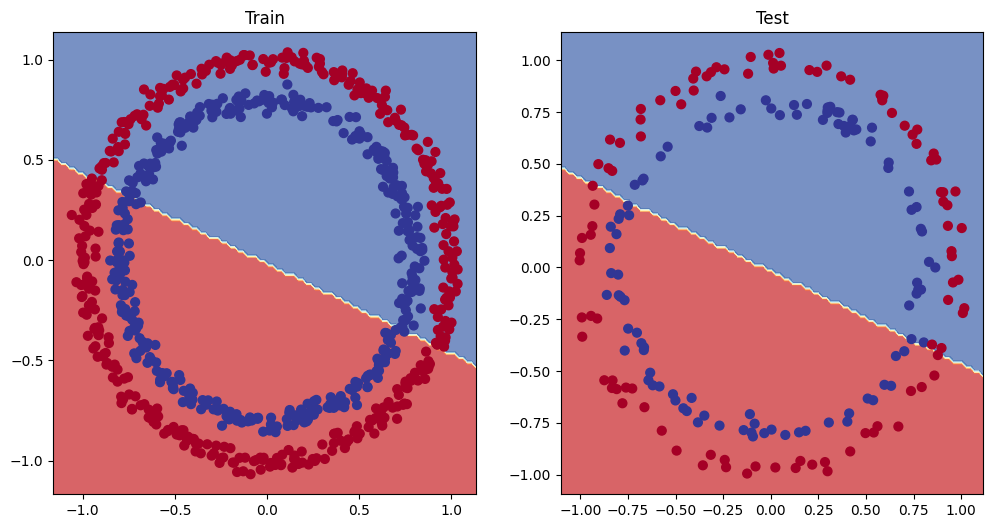

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patters in data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer (longer epochs)

* Changing the activation (for example: sigmoid function)

* Change the learning rate (making it smaller or larger)

* Change the loss function

These options are all from a model's perspective because they deal directly with the model than the data.

And because these options are all values can change, they are referred to as hyper parameters.

Lets try to improve the model by:

* adding more hidden units 5 -> 10
* increase number of layers: 2-> 3
* increase the number of epochs: 10 -> 1000

In [43]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    # # z stands for logits, it's basically taking x and passing it through layer 1 and assigning it to z
    # z = self.layer_1(x)
    # # then layer 2 and assigning to z
    # z = self.layer_2(x)
    # # then layer 3 and assigning to z
    # z = self.layer_3(x)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Write a training and evaluation loop:
epochs = 1000

for epoch in range(epochs):
  # 0. Training
  model_1.train()

  # 1. Forward pass (removes an extra one dimension)
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  # 0. Testing
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    # Calculate the accuracy
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

NotImplementedError: Module [CircleModelV1] is missing the required "forward" function